In [17]:
import pandas as pd
import utils
import matplotlib.pylab as plt


In [15]:
# categories = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',
#               '55-74 years', '75+ years']
df = utils.load_suicide_healthcare_gini_df()
cat = pd.Categorical(df.age)# categories=categories, ordered=True)
cat


['35-54 years', '75+ years', '25-34 years', '55-74 years', '15-24 years', ..., '25-34 years', '15-24 years', '75+ years', '5-14 years', '5-14 years']
Length: 2064
Categories (6, object): ['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']

In [29]:
from sklearn.manifold import TSNE
splits = utils.get_train_val_test_split()
tsne = TSNE(random_state=17, n_components=2)
X = splits['train']['X']
tsne_repr = tsne.fit_transform(X)

In [31]:
X[0]

array([ 1.14143122, -0.22772727,  0.98616475,  0.28837084, -0.24271926,
       -0.67897989,  0.60105187, -1.13151806, -0.51466619])

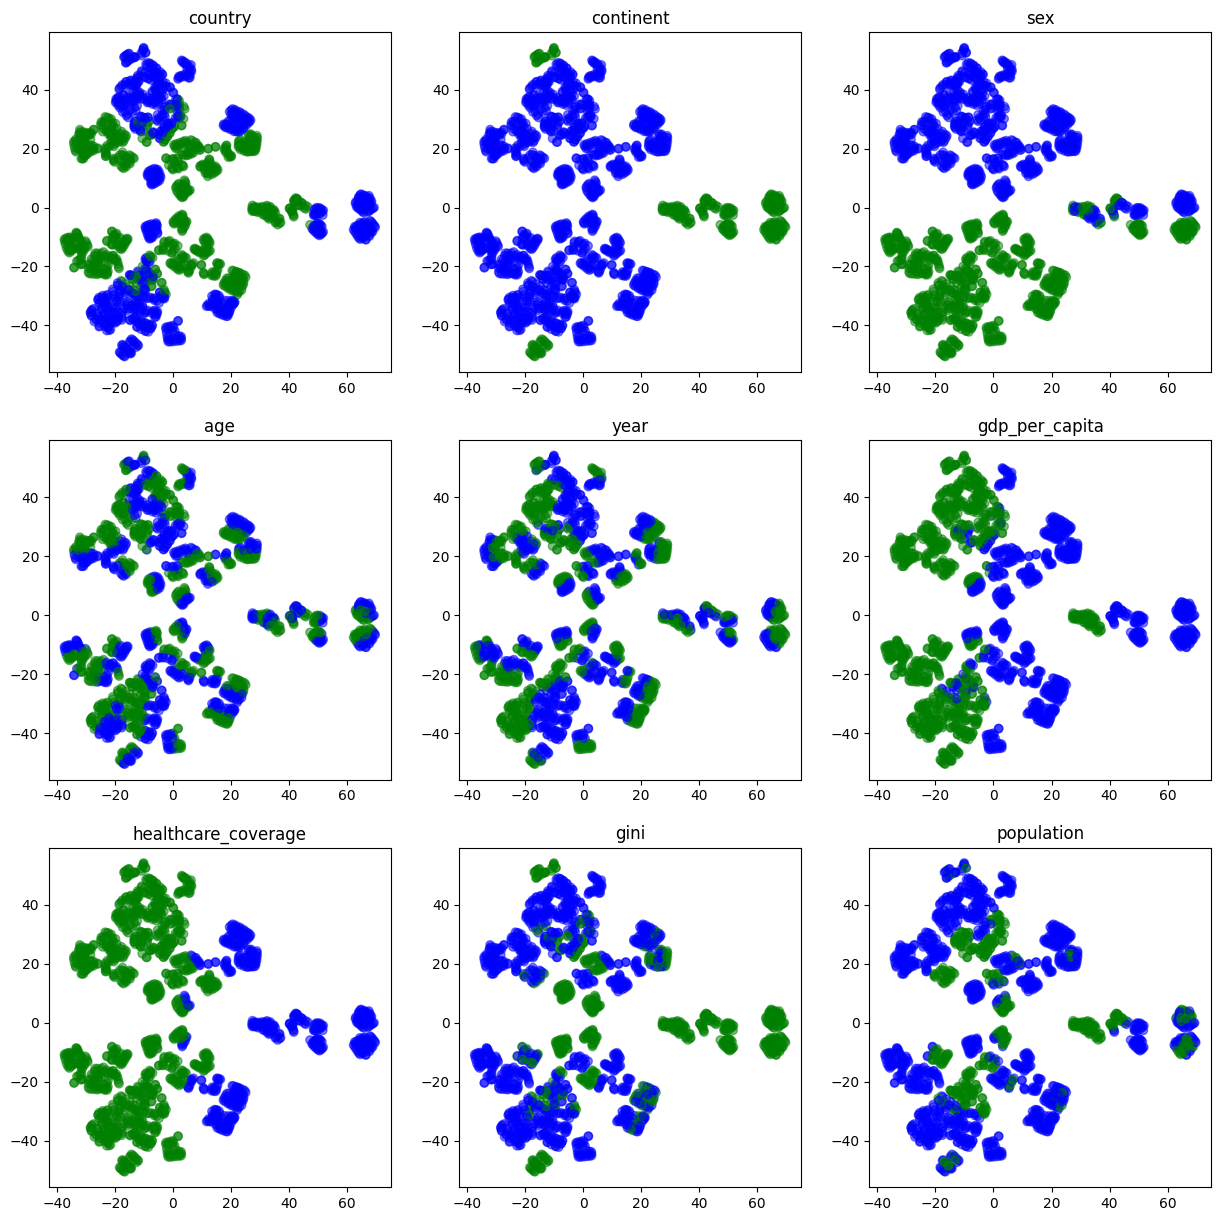

In [41]:
# fig = plt.figure()

# ax = fig.add_subplot(projection='3d')

# ax.scatter(tsne_repr[:, 0], tsne_repr[:, 1],tsne_repr[:, 2], alpha=0.5);
cols = ['country', 'continent', 'sex', 'age', 'year',
                  'gdp_per_capita', 'healthcare_coverage', 'gini', 'population']

# 9 cols -> 3y3 grid
#https://vitalflux.com/minmaxscaler-standardscaler-python-examples/#:~:text=Both%20MinMaxScaler%20and%20StandardScaler%20scale,a%20standard%20deviation%20of%201.
# => mean 0 var 1 , 0 as threshold reasonable
fig, ax = plt.subplots(figsize=(15, 15), nrows=3, ncols=3)
for i, col in enumerate(cols):
    cax = ax[i // 3][i % 3]
    cax.set_title(col)
    cax.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5, c=['green' if x[i] > 0 else 'blue' for x in X]);
